In [152]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Separação de dados

In [153]:
dados = pd.read_csv("data/Vehicle.csv")

# transform the last collumn into integer values
le = LabelEncoder()
le.fit(dados["Class"])
dados["Class"] = le.transform(dados["Class"])

df_dados = pd.DataFrame(dados)

output = pd.DataFrame(columns=["KNN", "DT", "NB", "SVM", "MLP"])

# print which class each integer value represents
print("Encoded Classes:")
print(le.classes_)

Encoded Classes:
['bus' 'opel' 'saab' 'van']


In [154]:
# shuffle the data and split it into train, validation and test sets
def ShuffleuSplit(df_dados):
    # shuffle data to avoid bias
    df_dados = shuffle(df_dados)
    x_treino, x_temp, y_treino, y_temp = train_test_split(
        df_dados, df_dados["Class"], test_size=0.5, stratify=df_dados["Class"]
    )
    x_validacao, x_teste, y_validacao, y_teste = train_test_split(
        x_temp, y_temp, test_size=0.5, stratify=y_temp
    )
    print("Treino")
    x_treino.info()
    y_treino.info()

    # print("\nValidação")
    # x_validacao.info()
    # y_validacao.info()

    # print("\nTeste")
    # x_teste.info()
    # y_teste.info()
    return x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste

In [155]:
#Plot Roc Curve
def plot_roc_curve(fper, tper,cor,classsificador):
    plt.clf()
    plt.plot(fper, tper, color=cor, label=classsificador)
    plt.plot([0, 1], [0, 1], color="green", linestyle='--')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

# KNN

In [156]:
def KNN_Func (x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste):
    KNN = KNeighborsClassifier(n_neighbors=5)

    KNN.fit(x_treino,y_treino)

    knn_predict_test = KNN.predict(x_teste)

    print("\nDesempenho do KNN")
    print(classification_report(y_teste,knn_predict_test))

    y_score = KNN.predict_proba(x_teste)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

    print("AUC KNN: ",metrics.auc(fpr,tpr))
    plot_roc_curve(fpr, tpr,"red","KNN")
    return y_score, fpr, tpr, metrics.auc(fpr,tpr)


# Árvore de Decisão

In [157]:
def DT_Func (x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste):
    DT = tree.DecisionTreeClassifier()
    DT.fit(x_treino,y_treino)

    dt_predict_test = DT.predict(x_teste)

    print("\nDesempenho da Árvore de Decisão")
    print(classification_report(y_teste,dt_predict_test))

    y_score = DT.predict_proba(x_teste)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

    print("AUC DT: ",metrics.auc(fpr,tpr))
    plot_roc_curve(fpr, tpr,"black","DT")
    return y_score, fpr, tpr, metrics.auc(fpr,tpr)

# Naive Bayes

In [158]:
def NaiveBayes_Func (x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste):
    NB = GaussianNB()
    NB.fit(x_treino,y_treino)

    nb_predict_test = NB.predict(x_teste)

    print("\nDesempenho do Naive Bayes")
    print(classification_report(y_teste,nb_predict_test))

    y_score = NB.predict_proba(x_teste)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)

    print("AUC NB: ",metrics.auc(fpr,tpr))
    plot_roc_curve(fpr, tpr,"blue","NaiVe Bayes")
    return y_score, fpr, tpr, metrics.auc(fpr,tpr)

# SVM

In [159]:
def SVM_Func (x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste):
    SVM = SVC(kernel="linear", probability=True)
    SVM.fit(x_treino, y_treino)

    svm_pred_validation = SVM.predict(x_validacao)

    print("\nDesempenho do SVM")
    print(classification_report(y_validacao, svm_pred_validation))

    y_score = SVM.predict_proba(x_teste)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_teste, y_score, pos_label=2)

    print("AUC SVM: ", metrics.auc(fpr, tpr))
    plot_roc_curve(fpr, tpr, "blue", "SVM")
    return y_score, fpr, tpr, metrics.auc(fpr,tpr), svm_pred_validation

# MLP

In [160]:
def MLP_Func (x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste, svm_pred_validation):
# Create an instance of the MLP classifier
    MLP = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
    MLP.fit(x_treino, y_treino)

    mlp_pred_validation = MLP.predict(x_validacao)

    print("\nDesempenho do SVM")
    print(classification_report(y_validacao, svm_pred_validation))

    y_score = MLP.predict_proba(x_teste)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_teste, y_score, pos_label=2)

    print("AUC MLP: ", metrics.auc(fpr, tpr))
    plot_roc_curve(fpr, tpr, "blue", "MLP")
    return y_score, fpr, tpr, metrics.auc(fpr,tpr)


Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 92 to 2
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 92 to 2
Series name: Class
Non-Null Count  Dtype
----

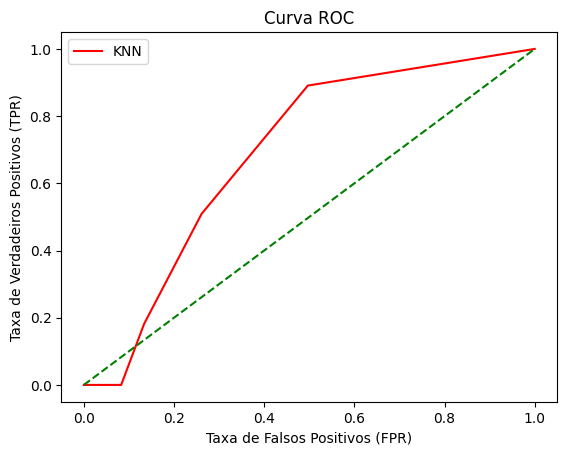


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


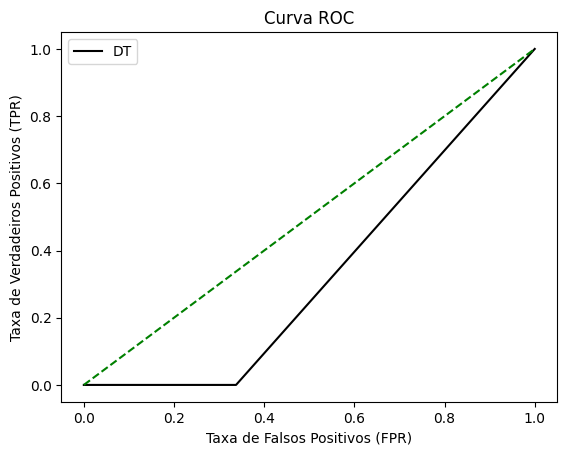


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


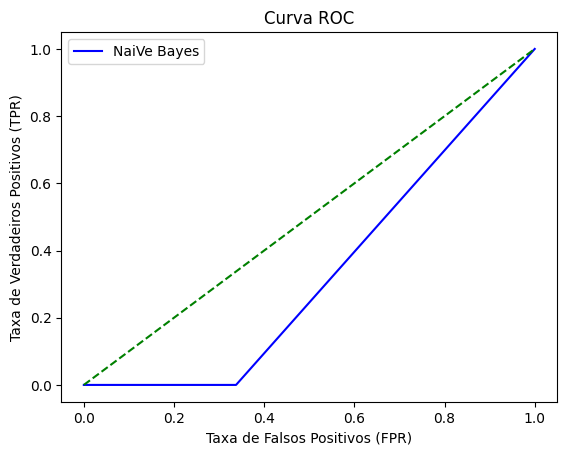


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        53
           2       0.95      1.00      0.97        54
           3       1.00      0.94      0.97        50

    accuracy                           0.99       211
   macro avg       0.99      0.98      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC SVM:  0.356687898089172


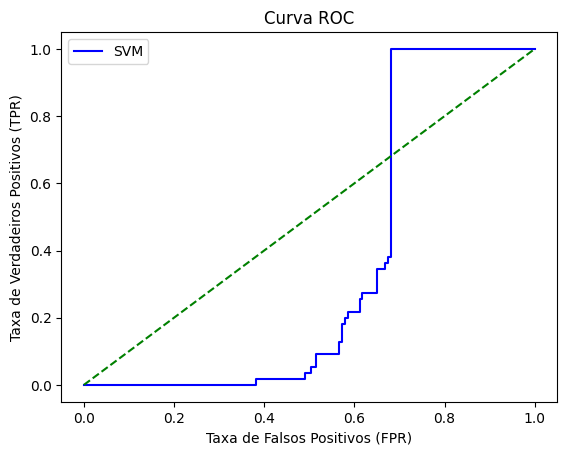


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        53
           2       0.95      1.00      0.97        54
           3       1.00      0.94      0.97        50

    accuracy                           0.99       211
   macro avg       0.99      0.98      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC MLP:  0.7295888824551244


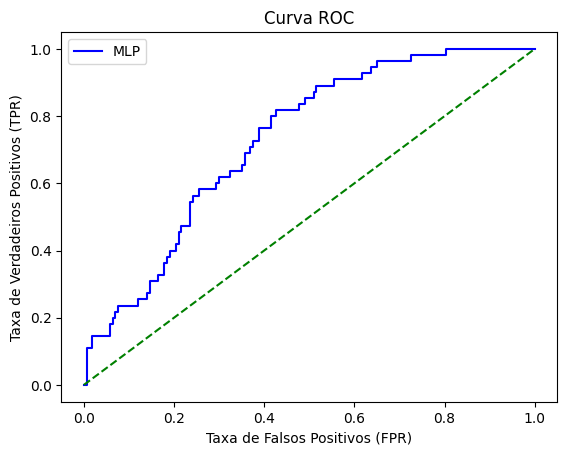

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 257 to 159
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 257 to 159
Series name: Class
Non-Null Count  Dtyp

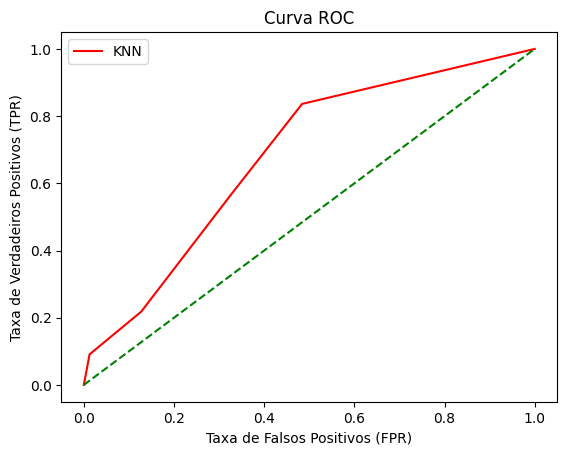


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


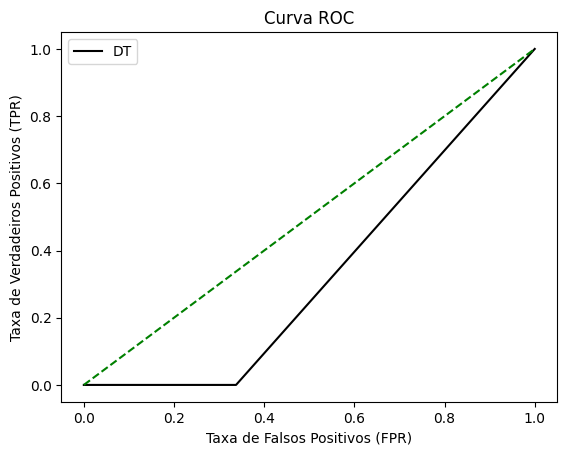


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


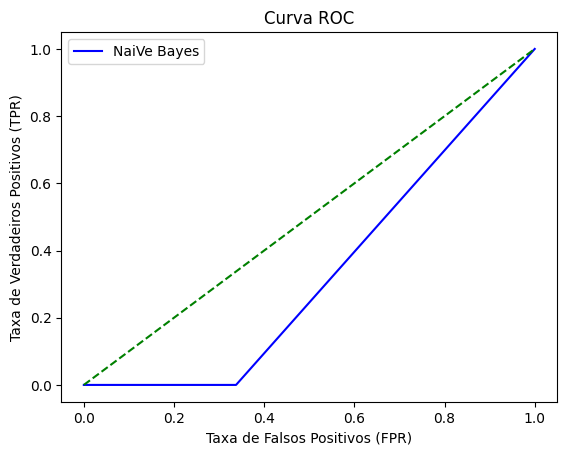


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.98      0.98      0.98        53
           2       0.98      1.00      0.99        54
           3       1.00      0.98      0.99        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC SVM:  0.4442385639837869


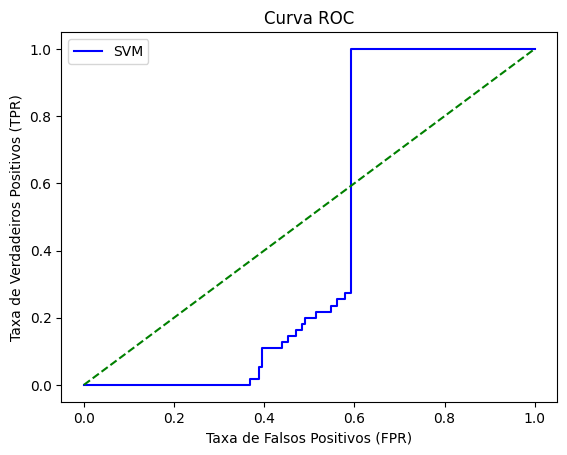


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.98      0.98      0.98        53
           2       0.98      1.00      0.99        54
           3       1.00      0.98      0.99        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC MLP:  0.7263462651997684


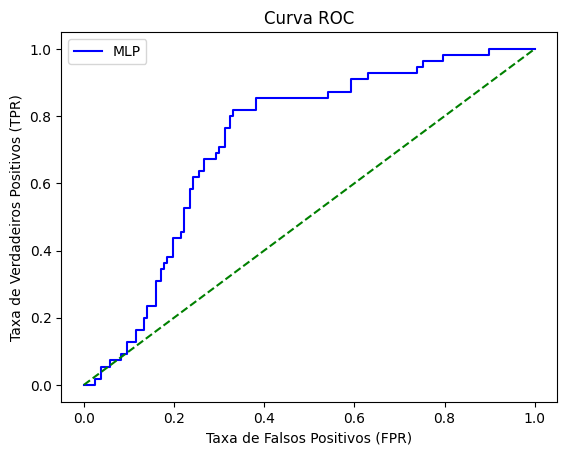

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 655 to 554
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 655 to 554
Series name: Class
Non-Null Count  Dtyp

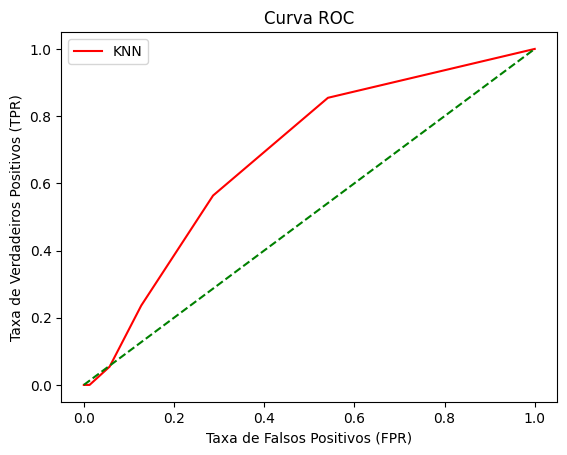


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


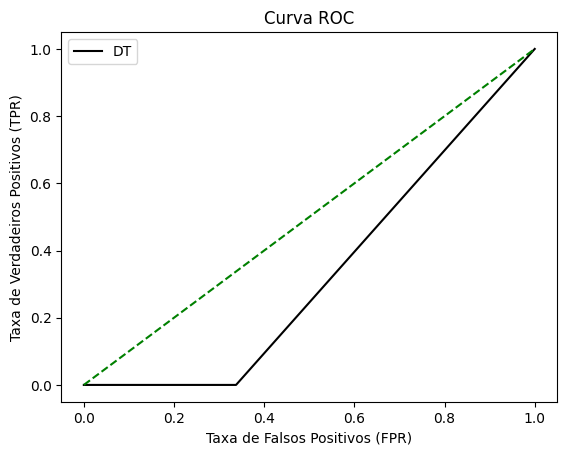


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


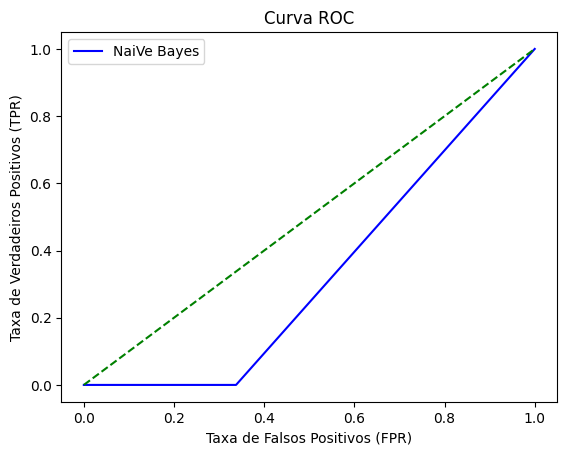


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.98      0.96      0.97        53
           2       0.93      0.98      0.95        54
           3       1.00      0.92      0.96        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC SVM:  0.32623045744064855


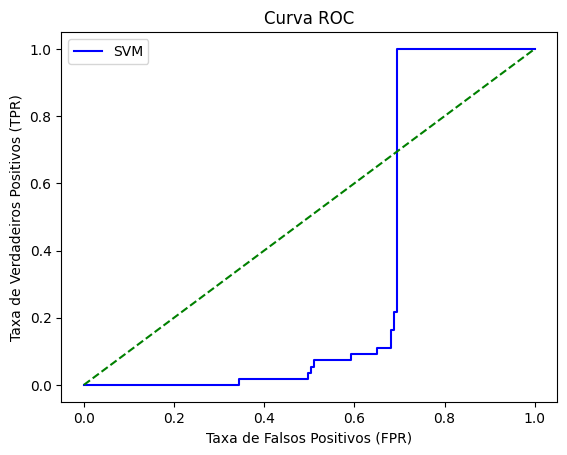


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.98      0.96      0.97        53
           2       0.93      0.98      0.95        54
           3       1.00      0.92      0.96        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC MLP:  0.7682686740011581


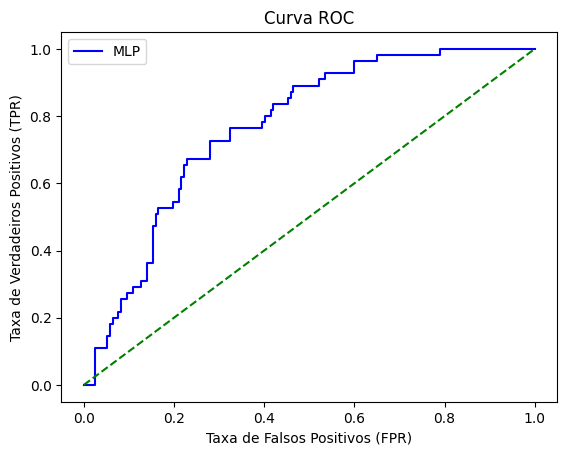

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 633 to 128
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 633 to 128
Series name: Class
Non-Null Count  Dtyp

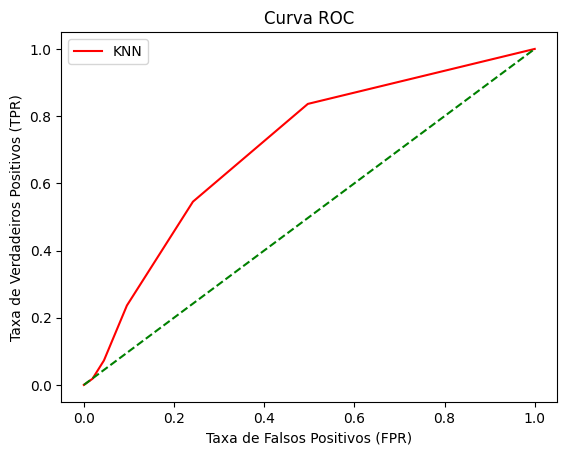


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


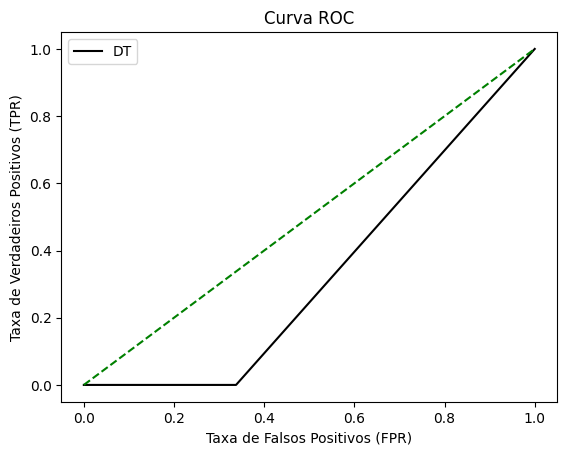


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


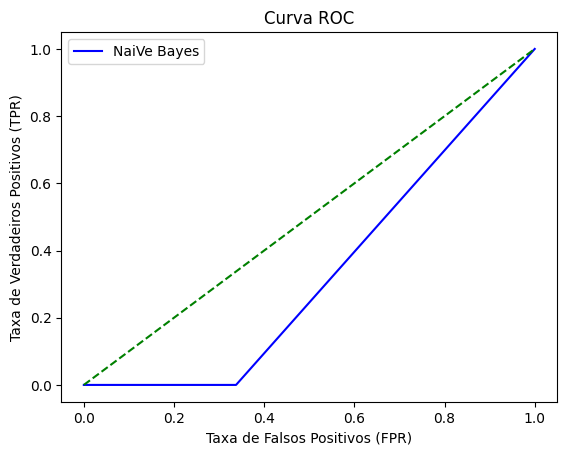


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        53
           2       0.96      1.00      0.98        54
           3       1.00      0.96      0.98        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC SVM:  0.36954255935147656


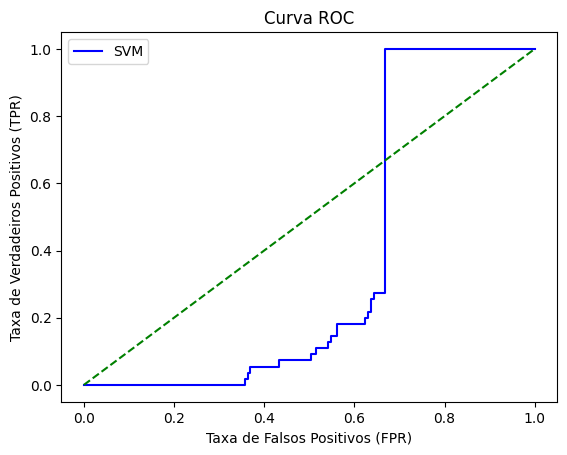


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        53
           2       0.96      1.00      0.98        54
           3       1.00      0.96      0.98        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC MLP:  0.7093225246091488


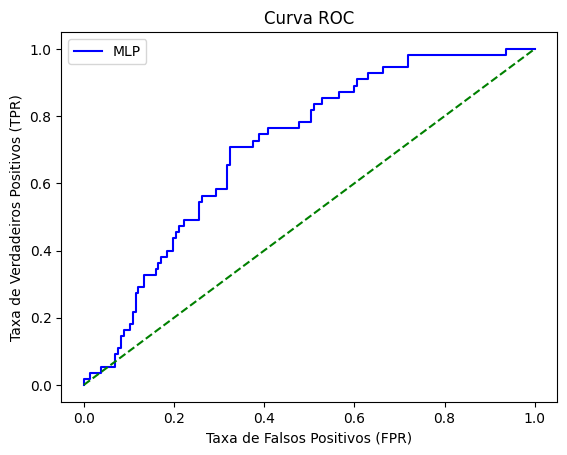

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 228 to 510
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 228 to 510
Series name: Class
Non-Null Count  Dtyp

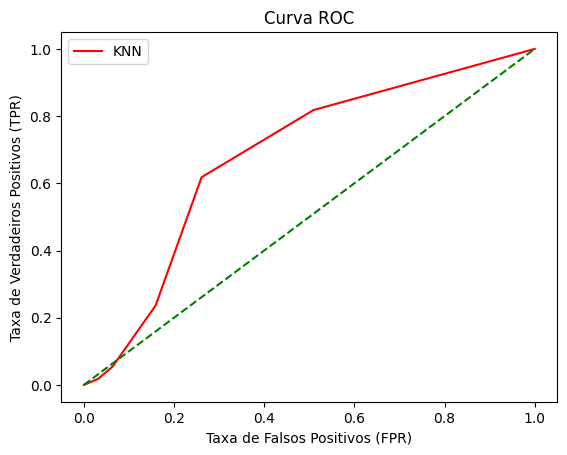


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


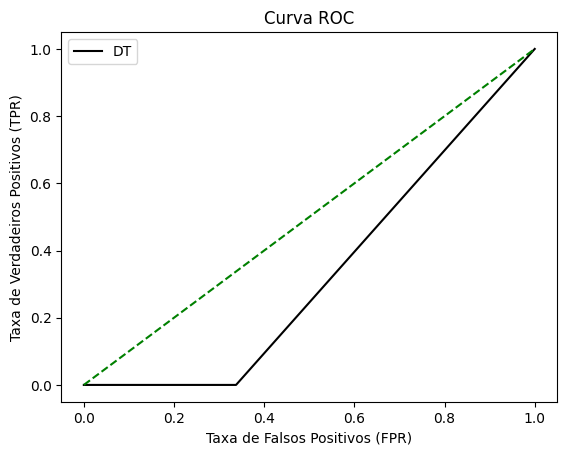


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


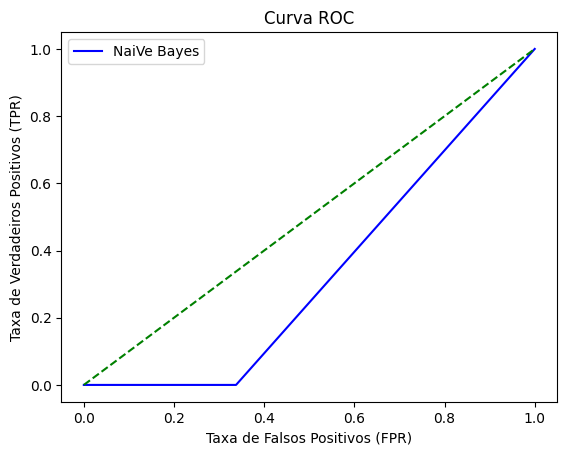


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       1.00      0.94      0.97        53
           2       0.96      0.98      0.97        54
           3       0.98      0.94      0.96        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC SVM:  0.3554140127388536


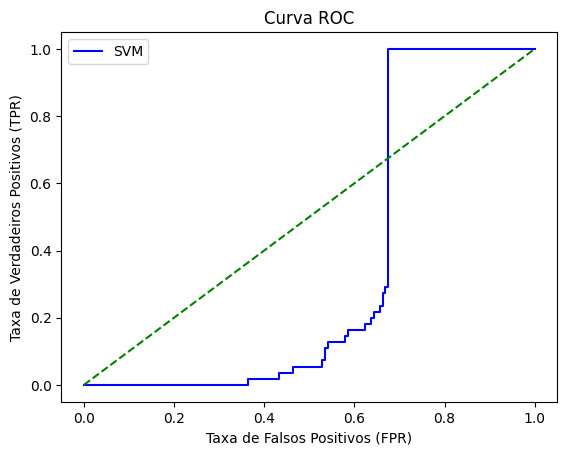


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       1.00      0.94      0.97        53
           2       0.96      0.98      0.97        54
           3       0.98      0.94      0.96        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC MLP:  0.7945570353213665


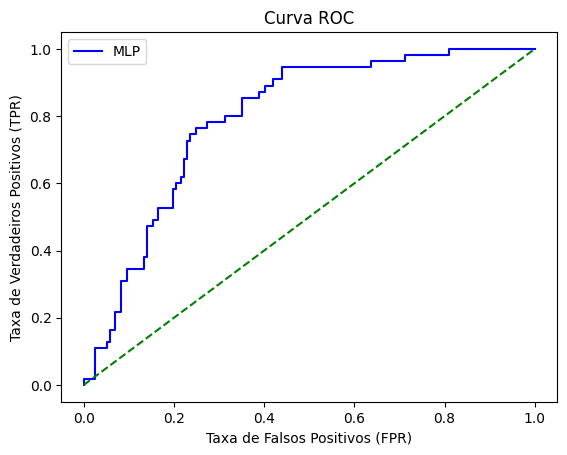

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 193 to 498
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 193 to 498
Series name: Class
Non-Null Count  Dtyp

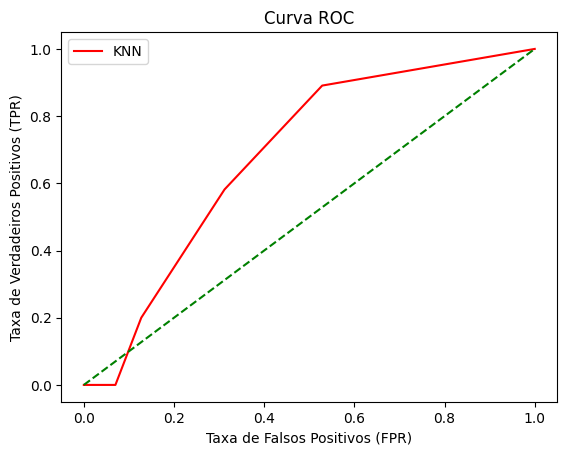


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


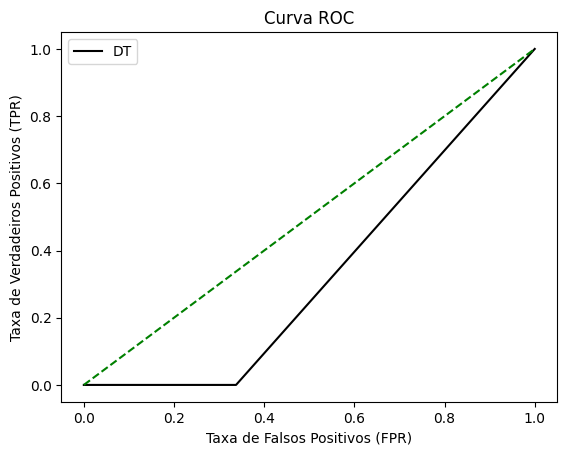


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


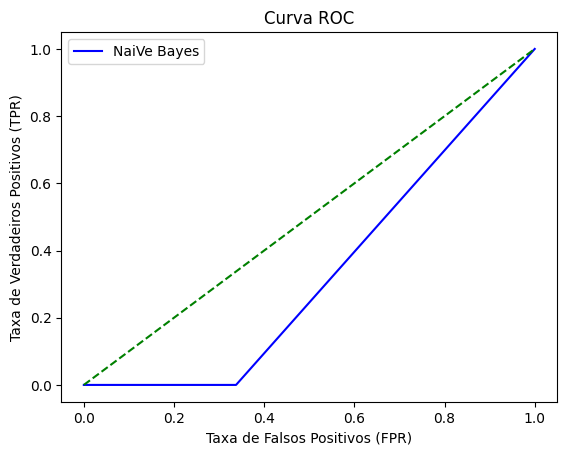


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       1.00      0.98      0.99        53
           2       1.00      0.93      0.96        54
           3       0.93      1.00      0.96        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC SVM:  0.3412854661262305


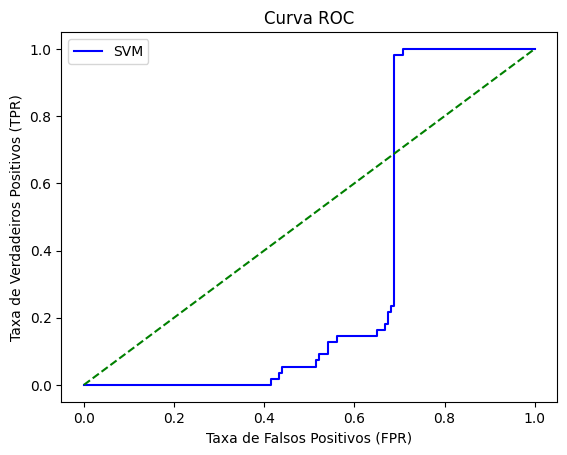


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       1.00      0.98      0.99        53
           2       1.00      0.93      0.96        54
           3       0.93      1.00      0.96        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC MLP:  0.6516502605674581


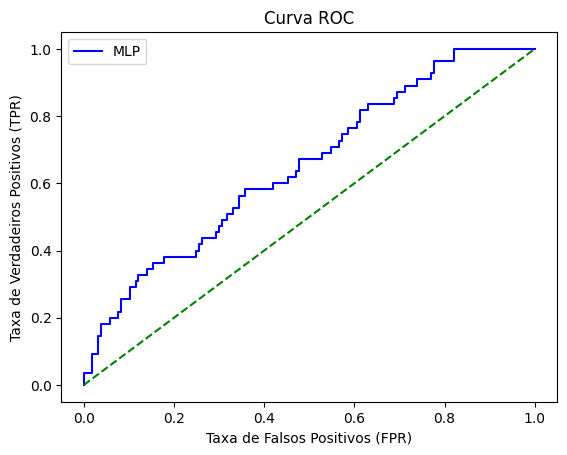

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 557 to 351
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 557 to 351
Series name: Class
Non-Null Count  Dtyp

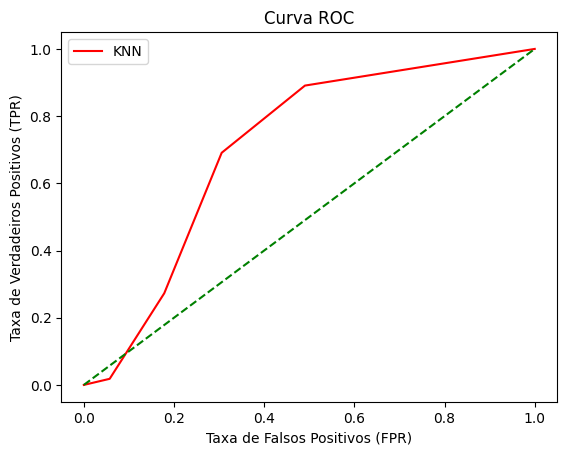


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


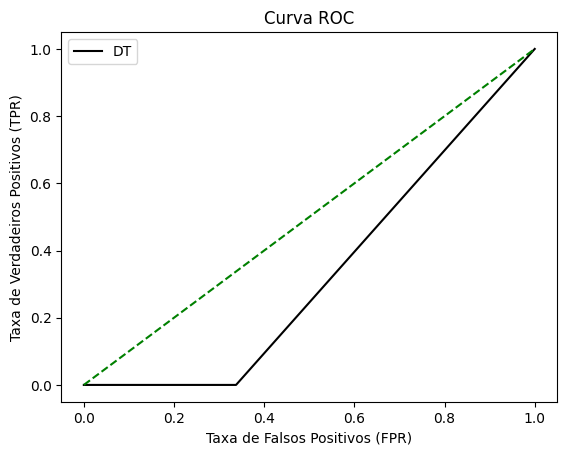


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


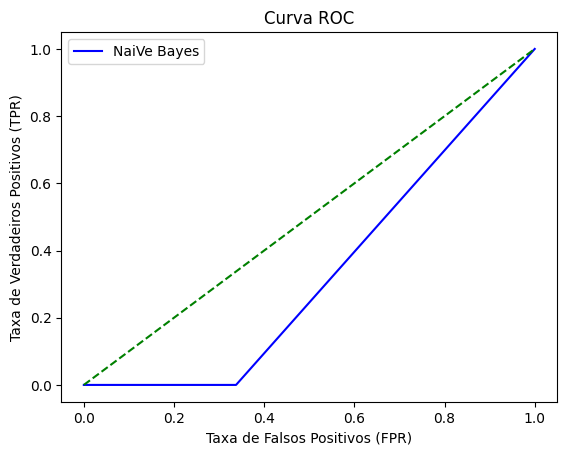


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.96      0.98      0.97        53
           2       0.91      0.98      0.95        54
           3       0.98      0.90      0.94        50

    accuracy                           0.96       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211

AUC SVM:  0.3357266936884772


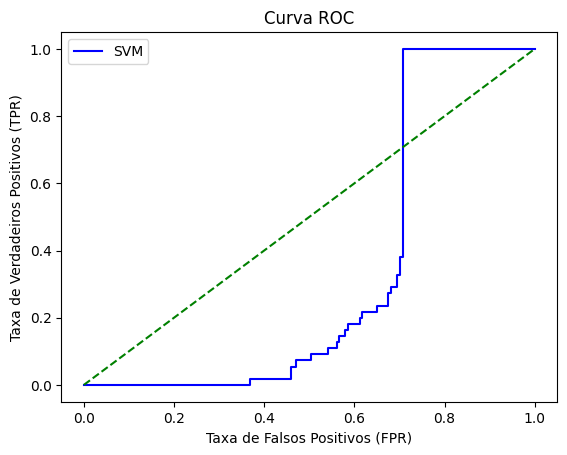


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.96      0.98      0.97        53
           2       0.91      0.98      0.95        54
           3       0.98      0.90      0.94        50

    accuracy                           0.96       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211

AUC MLP:  0.655819339895773


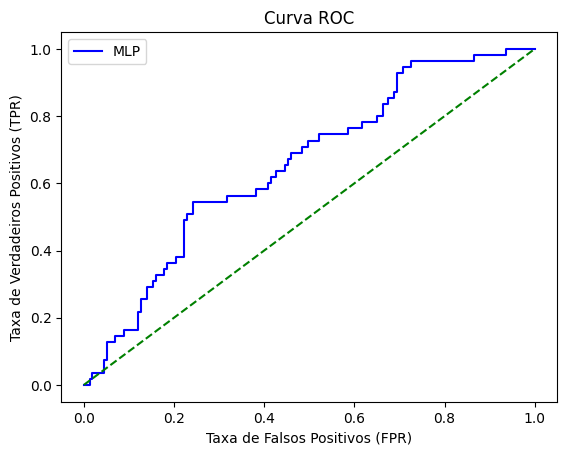

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 628 to 430
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 628 to 430
Series name: Class
Non-Null Count  Dtyp

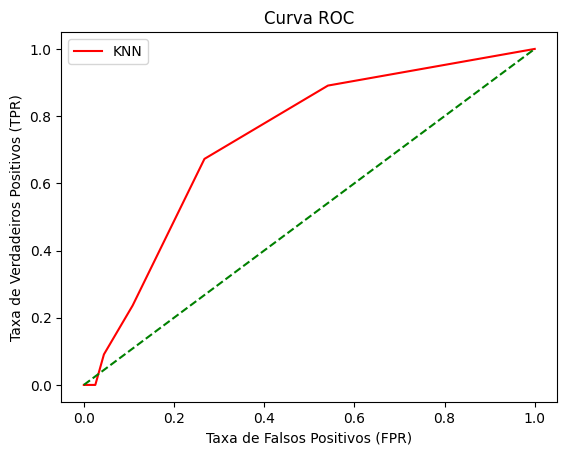


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


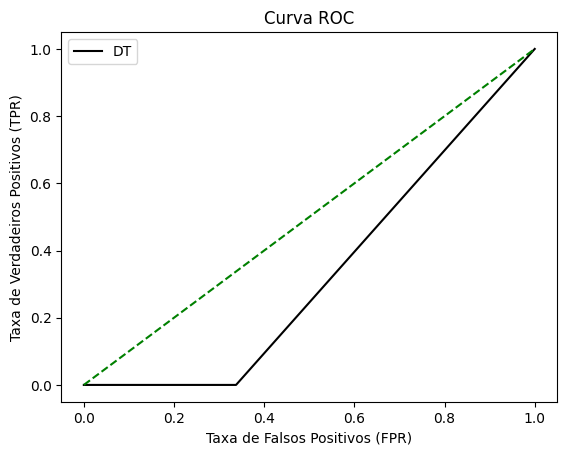


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


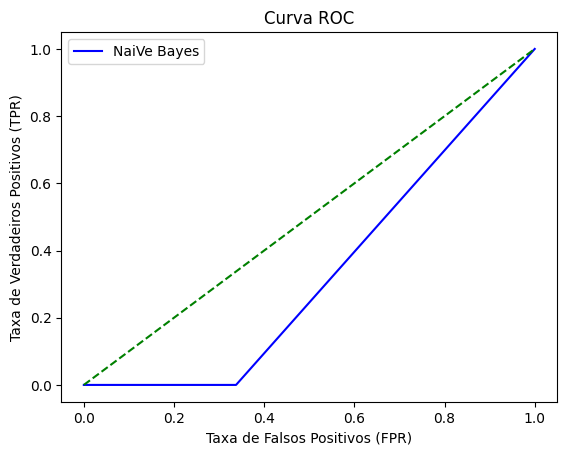


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        53
           2       0.93      0.98      0.95        54
           3       0.98      0.92      0.95        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC SVM:  0.34742327735958317


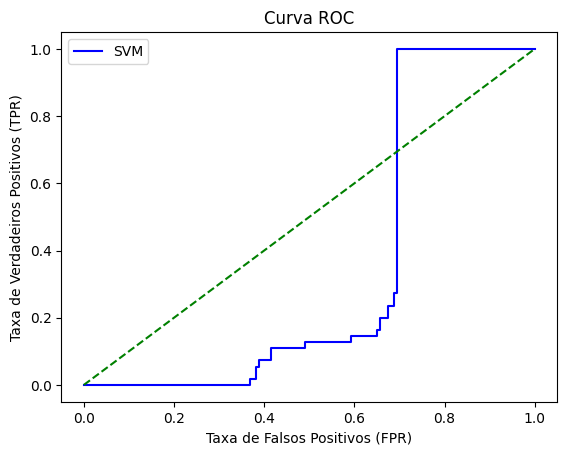


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        53
           2       0.93      0.98      0.95        54
           3       0.98      0.92      0.95        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC MLP:  0.7549507817023741


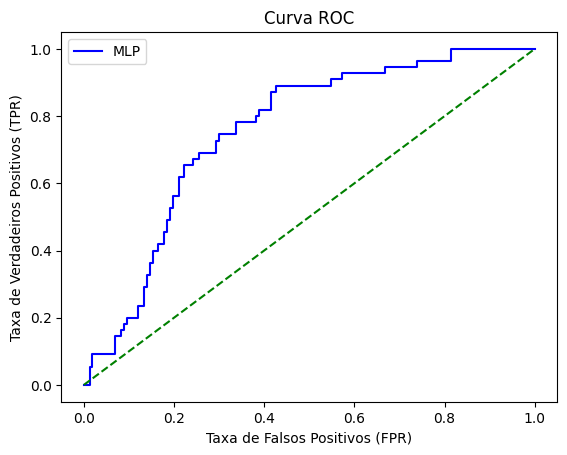

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 358 to 199
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 358 to 199
Series name: Class
Non-Null Count  Dtyp

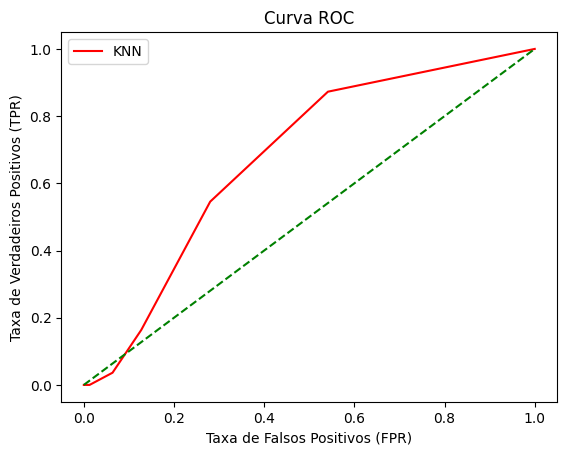


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


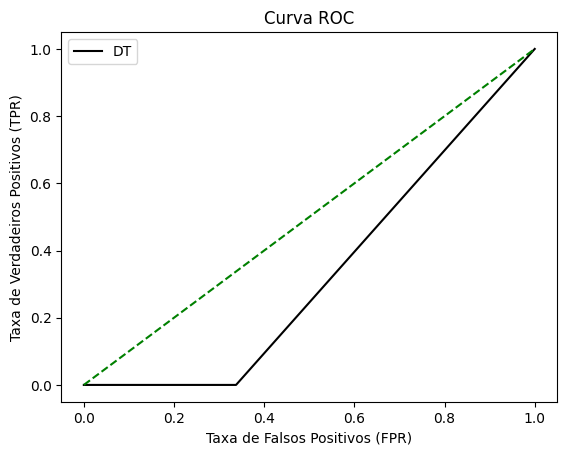


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


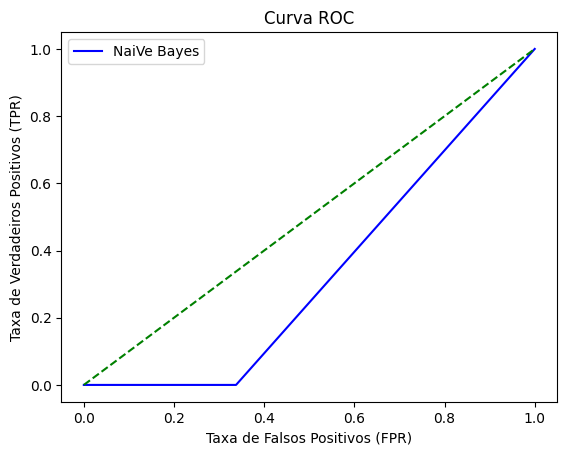


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        53
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        50

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

AUC SVM:  0.467515923566879


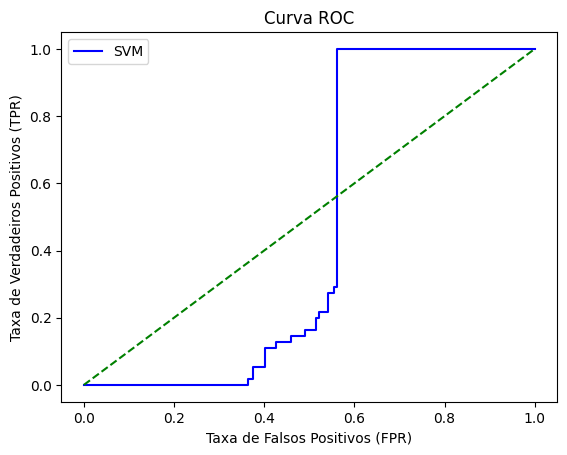


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.98      1.00      0.99        53
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        50

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

AUC MLP:  0.6872032426172554


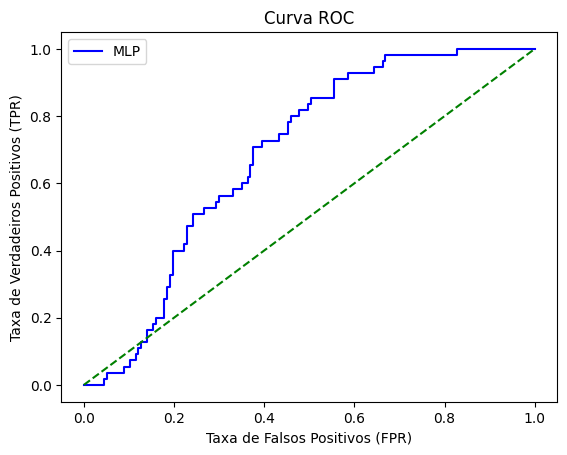

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 96 to 51
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 96 to 51
Series name: Class
Non-Null Count  Dtype
--

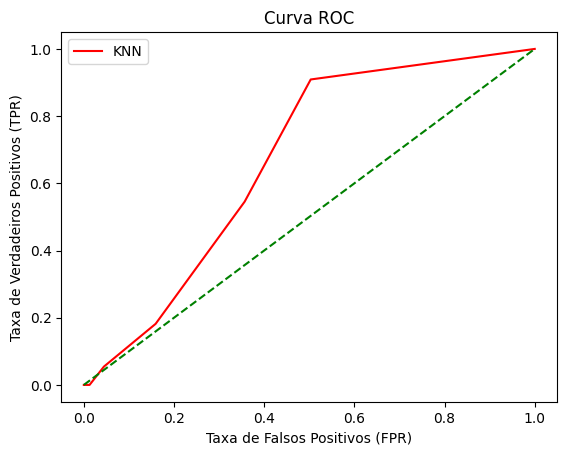


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


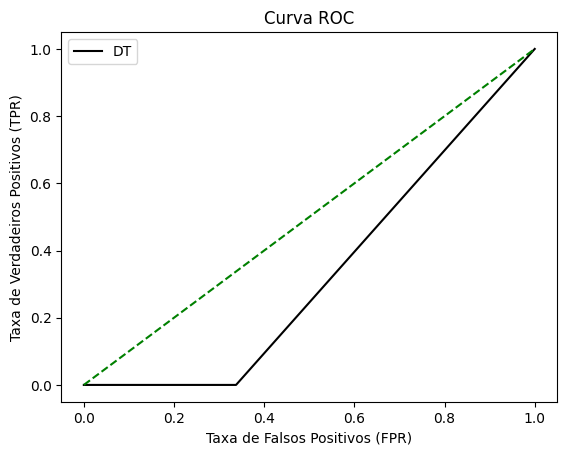


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


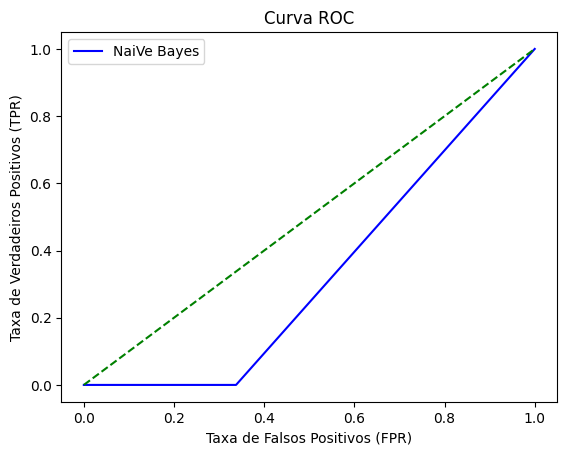


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.96      0.98      0.97        53
           2       1.00      0.98      0.99        54
           3       1.00      1.00      1.00        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC SVM:  0.43717429067747543


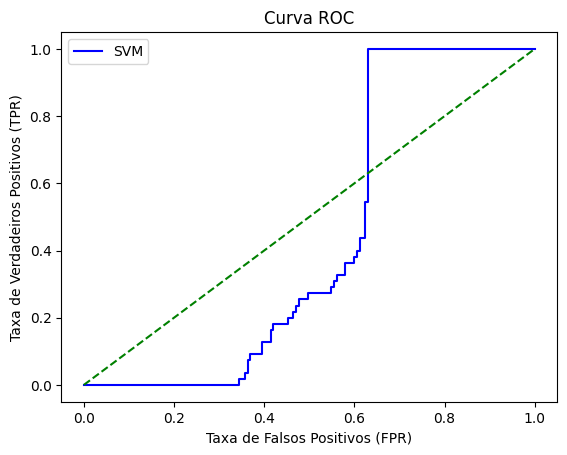


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.96      0.98      0.97        53
           2       1.00      0.98      0.99        54
           3       1.00      1.00      1.00        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC MLP:  0.7261146496815286


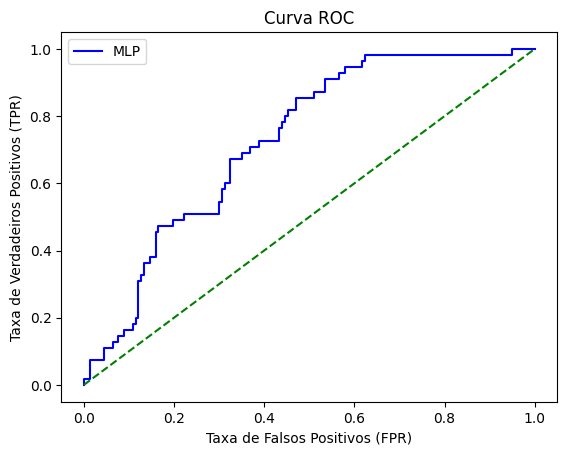

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 507 to 398
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 507 to 398
Series name: Class
Non-Null Count  Dtyp

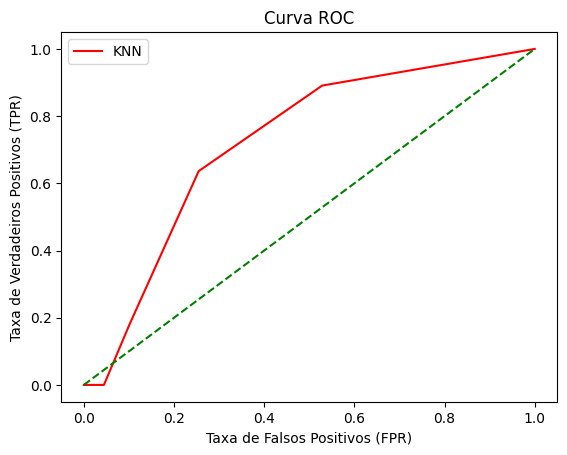


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


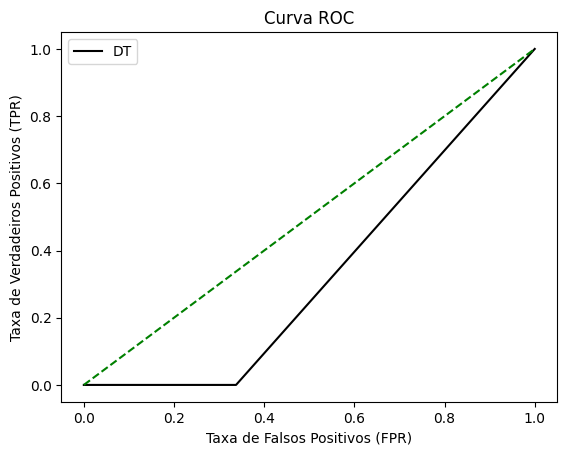


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


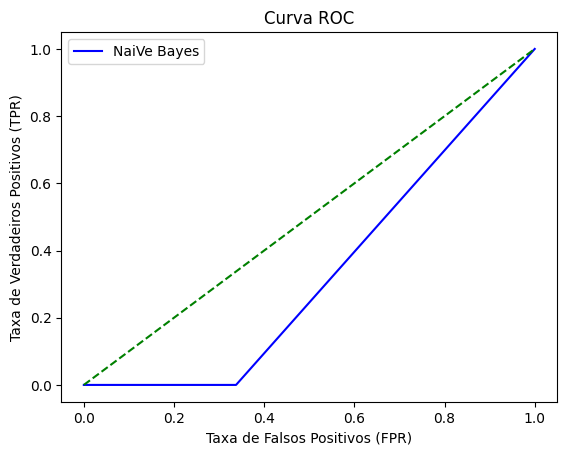


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.98      0.96      0.97        53
           2       0.95      1.00      0.97        54
           3       1.00      0.94      0.97        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC SVM:  0.38228141285466133


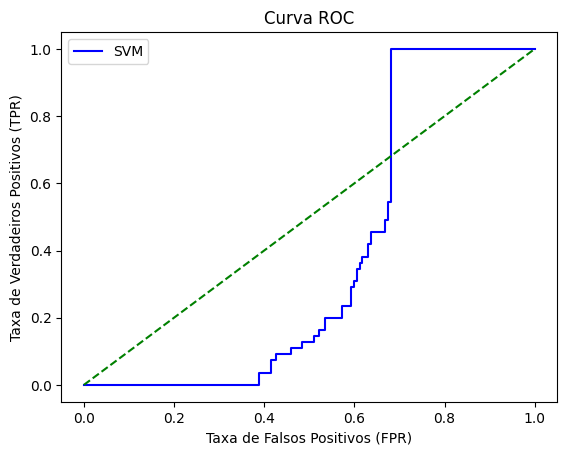


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.98      0.96      0.97        53
           2       0.95      1.00      0.97        54
           3       1.00      0.94      0.97        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC MLP:  0.7995367689635205


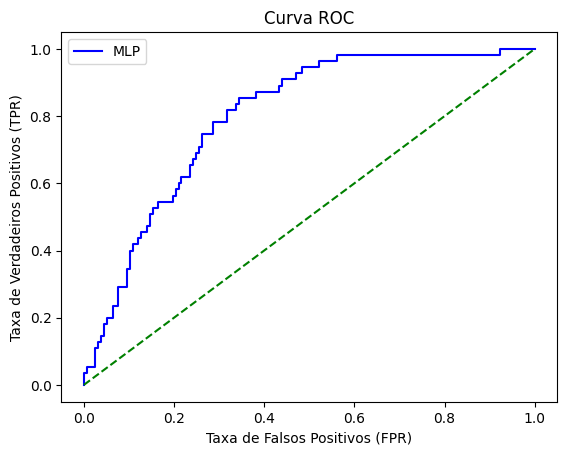

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 4 to 830
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 4 to 830
Series name: Class
Non-Null Count  Dtype
--

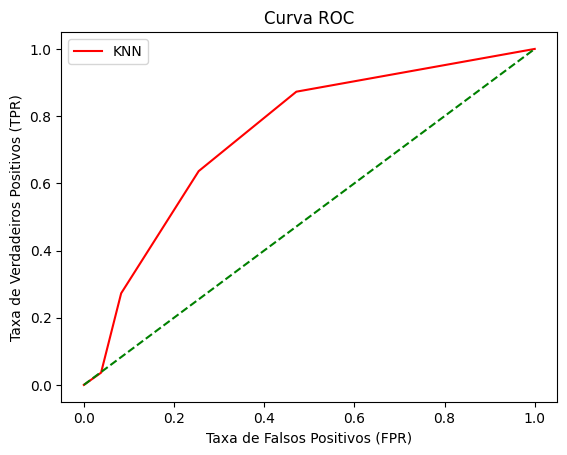


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


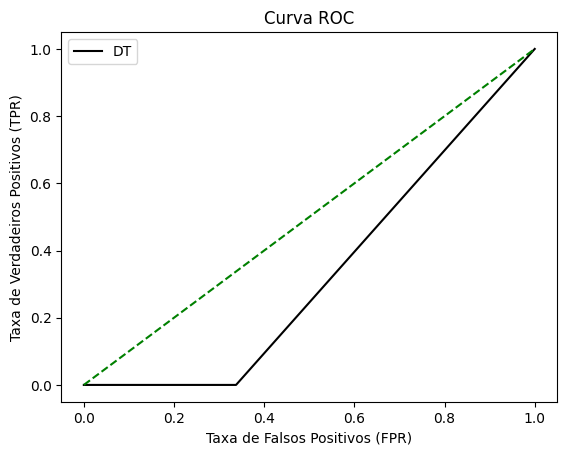


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


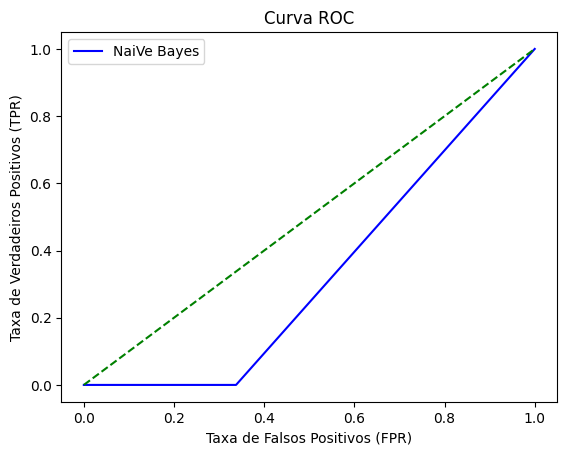


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.96      0.91      0.93        53
           2       0.98      0.96      0.97        54
           3       0.98      0.96      0.97        50

    accuracy                           0.95       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211

AUC SVM:  0.4504921829762594


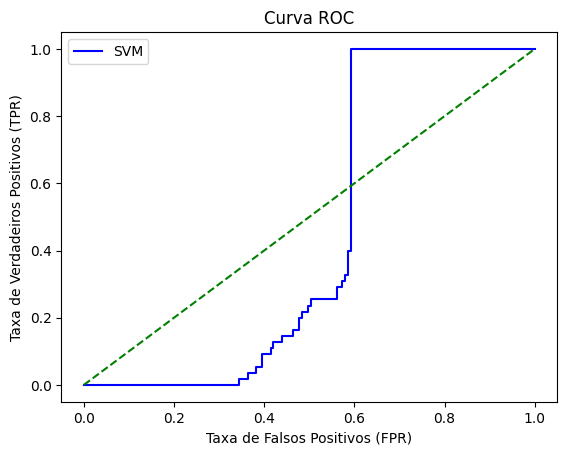


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        54
           1       0.96      0.91      0.93        53
           2       0.98      0.96      0.97        54
           3       0.98      0.96      0.97        50

    accuracy                           0.95       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211

AUC MLP:  0.7301679212507238


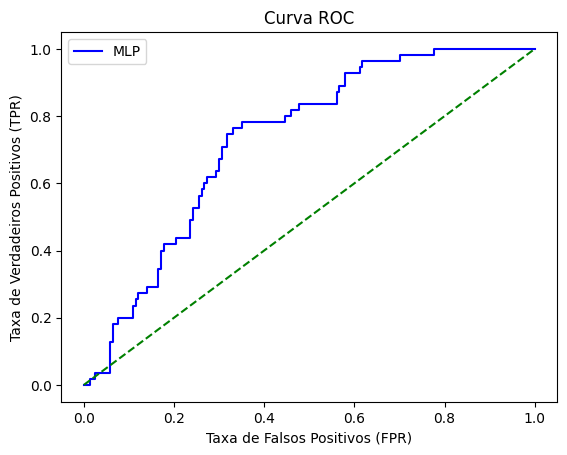

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 424 to 258
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 424 to 258
Series name: Class
Non-Null Count  Dtyp

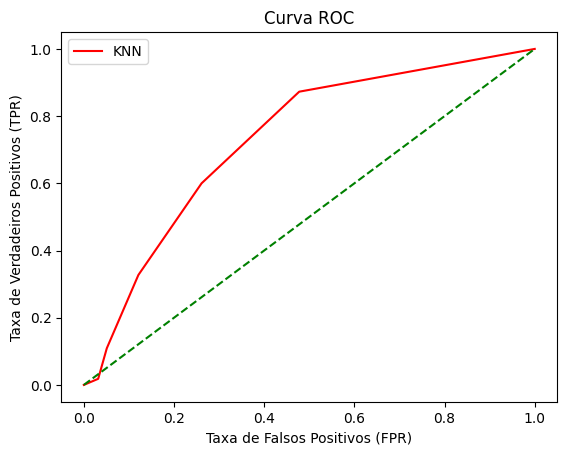


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


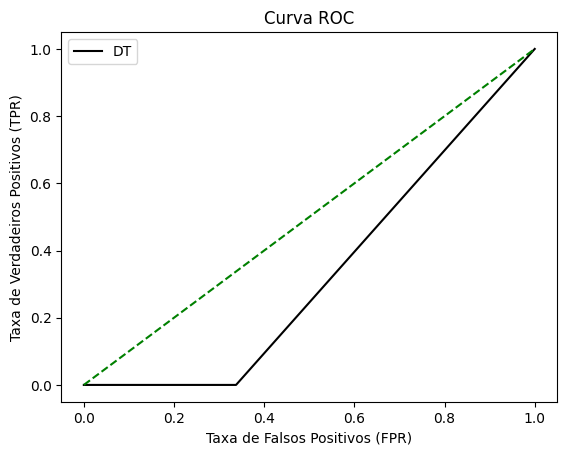


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


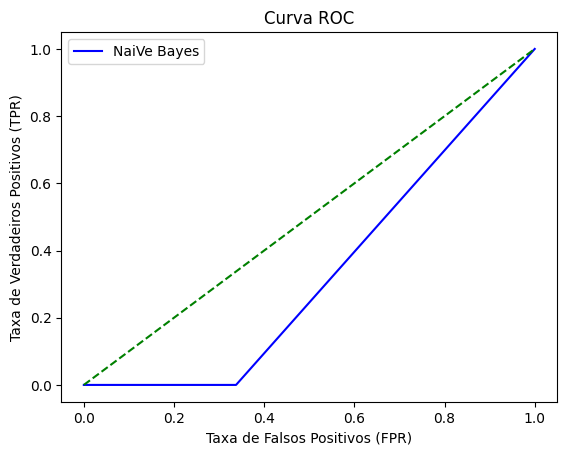


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        53
           2       0.96      0.98      0.97        54
           3       0.98      0.96      0.97        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC SVM:  0.34186450492182985


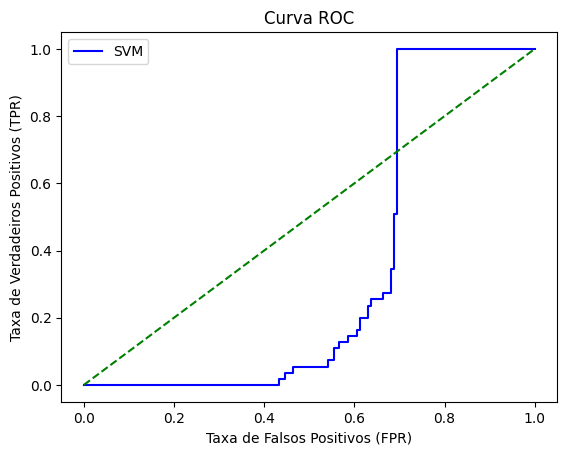


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        53
           2       0.96      0.98      0.97        54
           3       0.98      0.96      0.97        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC MLP:  0.7021424435437175


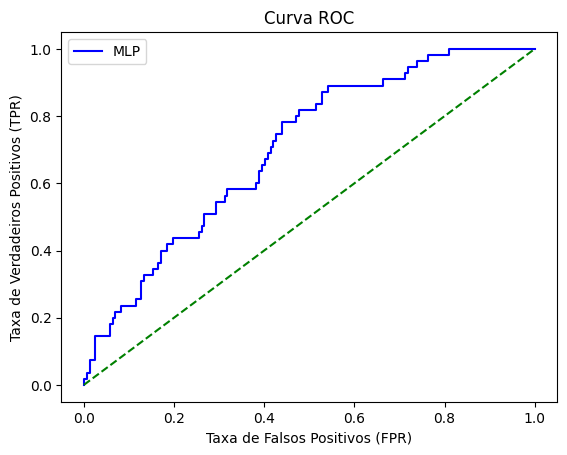

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 594 to 823
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 594 to 823
Series name: Class
Non-Null Count  Dtyp

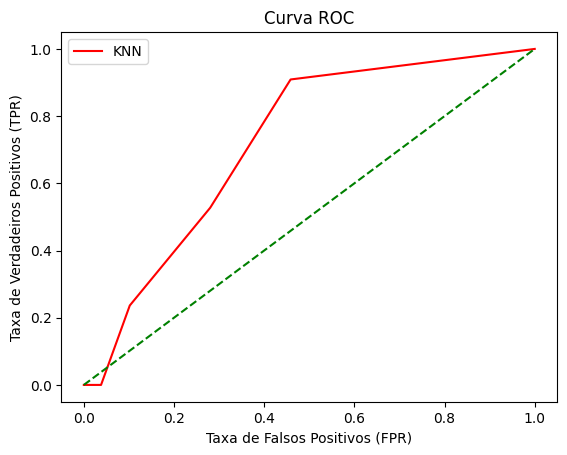


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


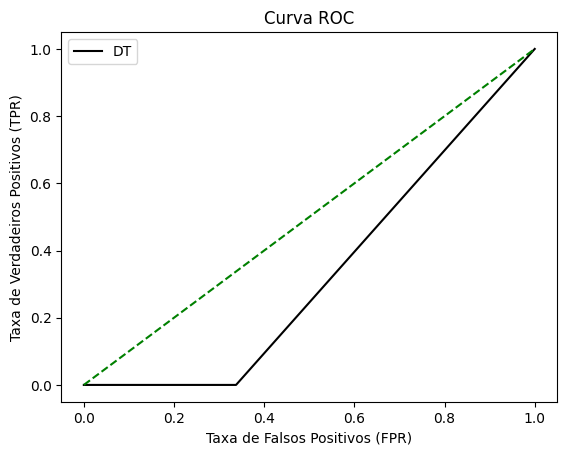


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


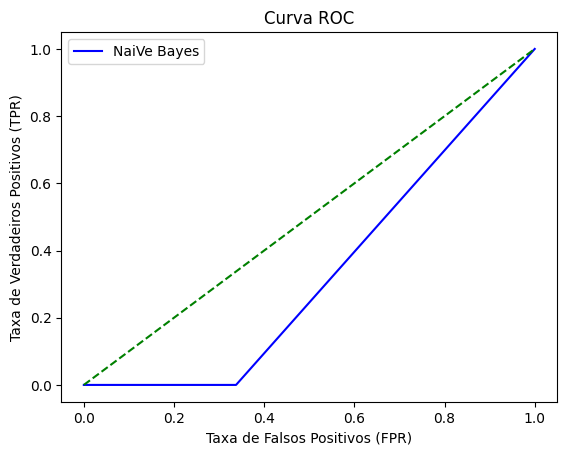


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       1.00      1.00      1.00        53
           2       0.98      0.98      0.98        54
           3       0.96      0.98      0.97        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC SVM:  0.2601042269832079


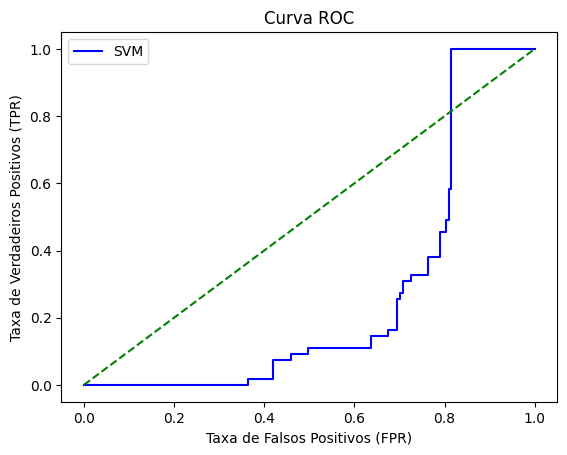


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       1.00      1.00      1.00        53
           2       0.98      0.98      0.98        54
           3       0.96      0.98      0.97        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC MLP:  0.7354950781702374


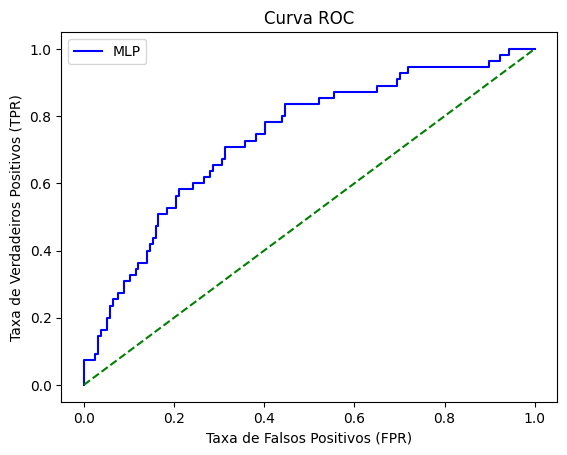

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 715 to 740
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 715 to 740
Series name: Class
Non-Null Count  Dtyp

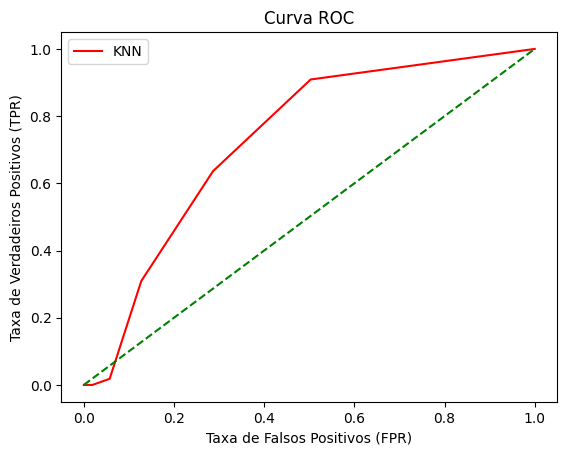


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


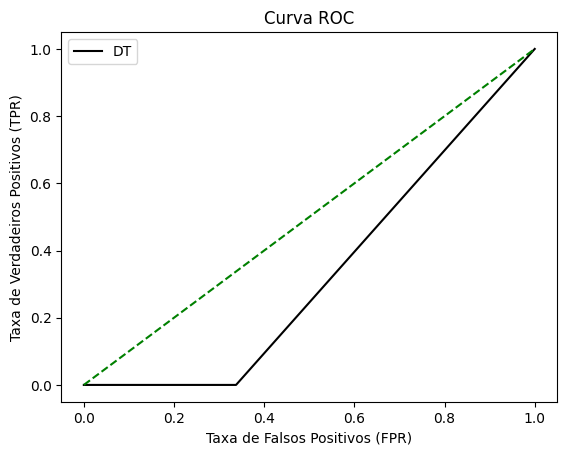


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


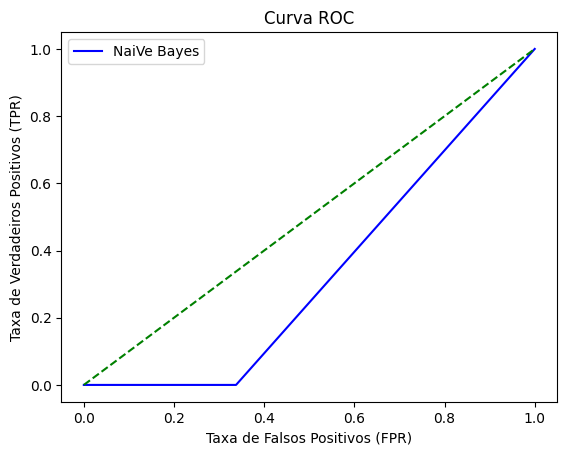


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.96      1.00      0.98        53
           2       1.00      0.96      0.98        54
           3       0.96      1.00      0.98        50

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211

AUC SVM:  0.395020266357846


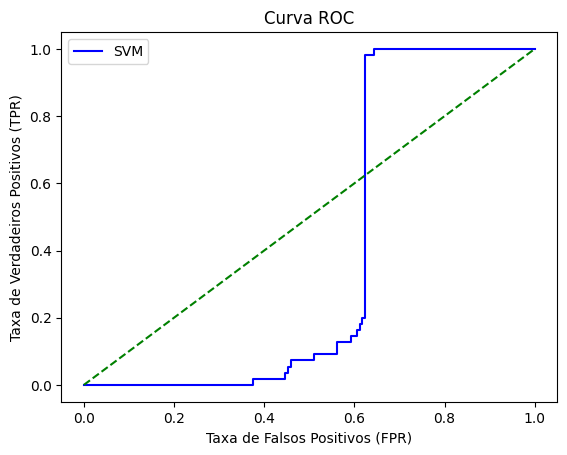


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.96      1.00      0.98        53
           2       1.00      0.96      0.98        54
           3       0.96      1.00      0.98        50

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211

AUC MLP:  0.8187608569774175


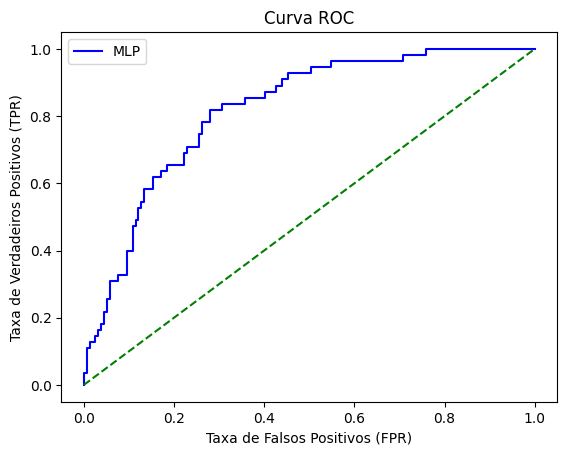

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 11 to 240
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 11 to 240
Series name: Class
Non-Null Count  Dtype


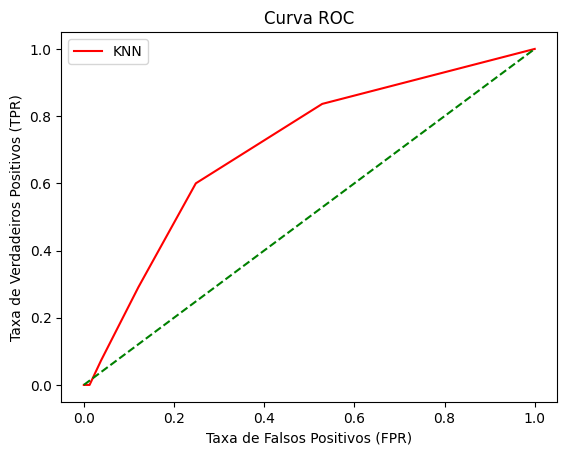


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


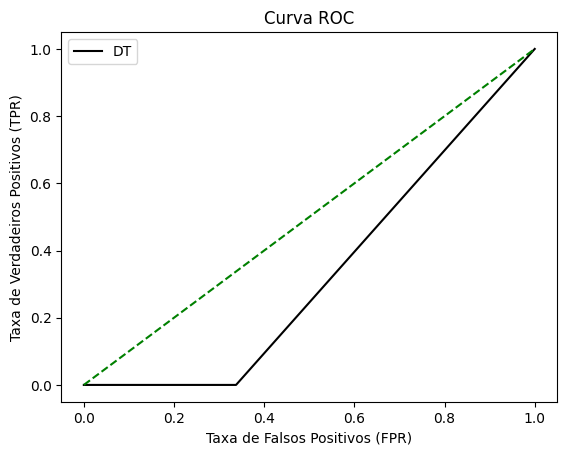


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


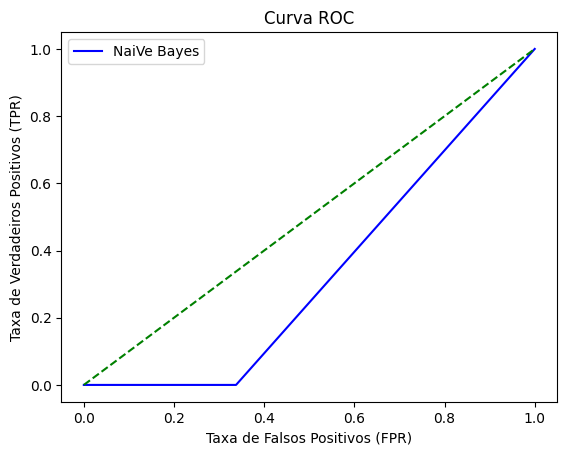


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       1.00      0.96      0.98        53
           2       1.00      1.00      1.00        54
           3       0.98      1.00      0.99        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC SVM:  0.38540822235089756


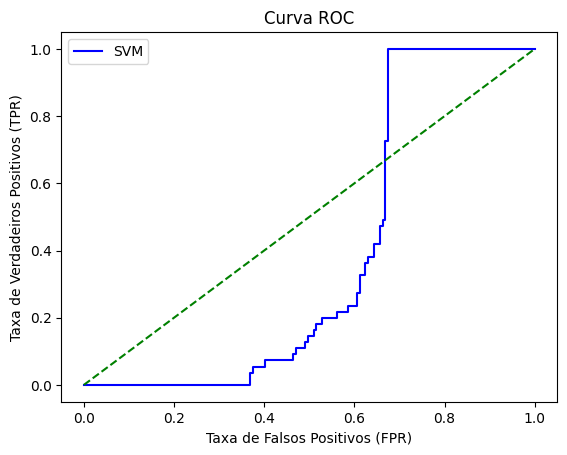


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       1.00      0.96      0.98        53
           2       1.00      1.00      1.00        54
           3       0.98      1.00      0.99        50

    accuracy                           0.99       211
   macro avg       0.99      0.99      0.99       211
weighted avg       0.99      0.99      0.99       211

AUC MLP:  0.7549507817023741


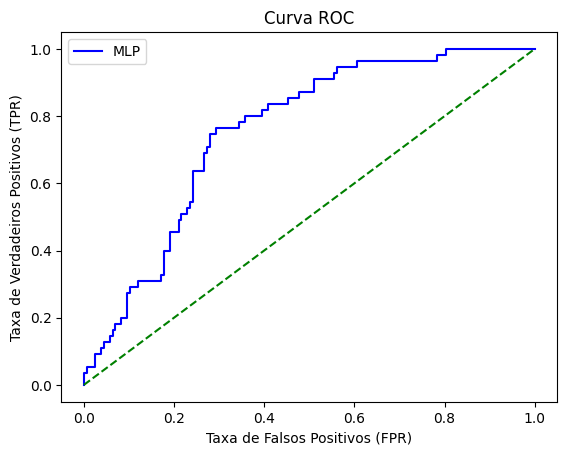

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 492 to 272
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 492 to 272
Series name: Class
Non-Null Count  Dtyp

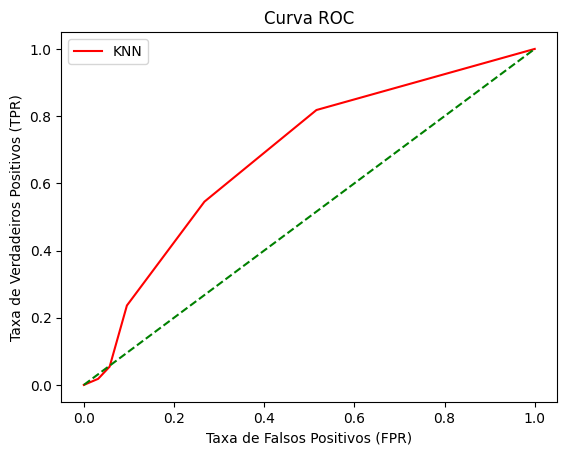


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


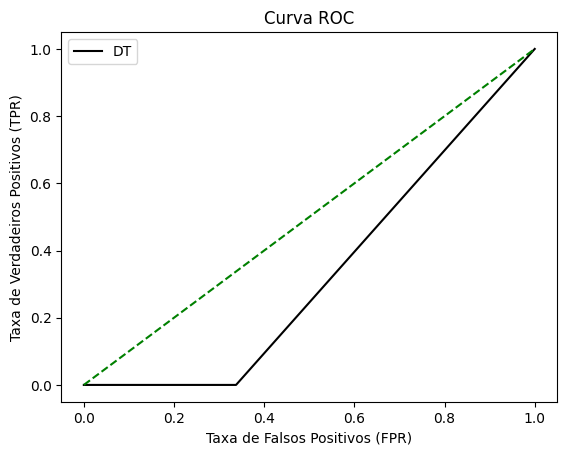


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


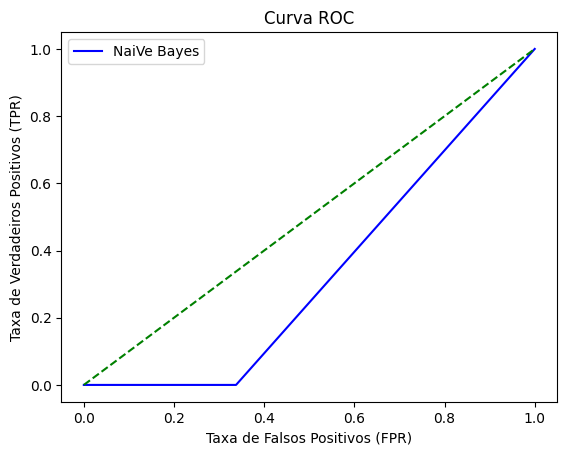


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.98      0.98      0.98        53
           2       0.96      0.98      0.97        54
           3       0.94      0.96      0.95        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC SVM:  0.4327735958309207


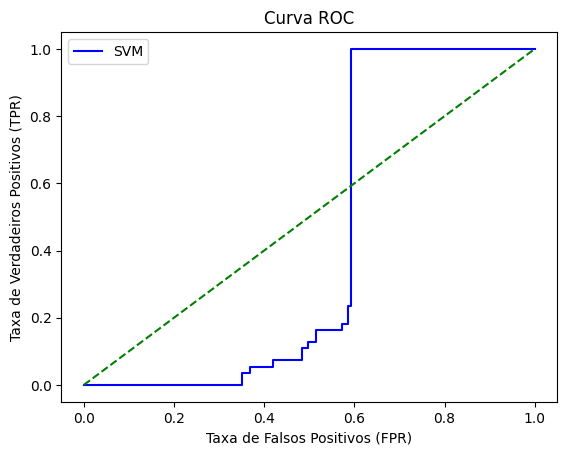


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.98      0.98      0.98        53
           2       0.96      0.98      0.97        54
           3       0.94      0.96      0.95        50

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

AUC MLP:  0.7850607990735379


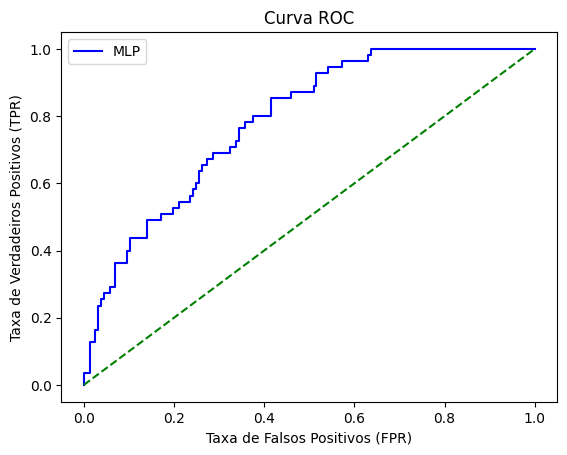

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 803 to 135
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 803 to 135
Series name: Class
Non-Null Count  Dtyp

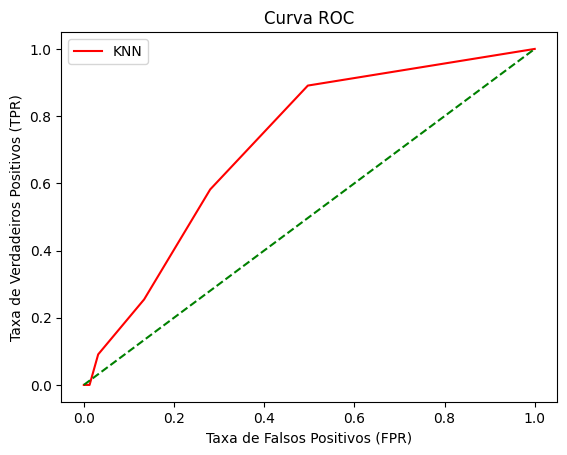


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


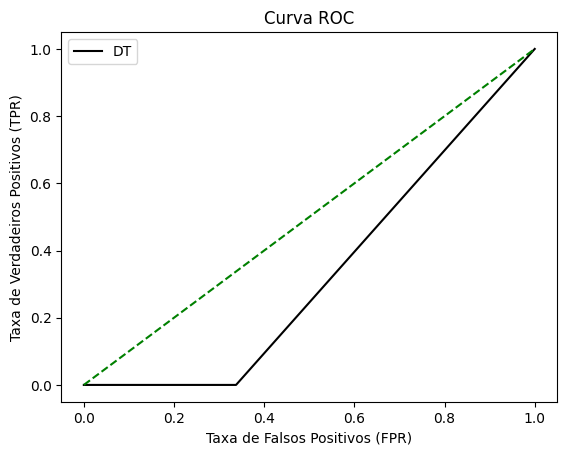


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


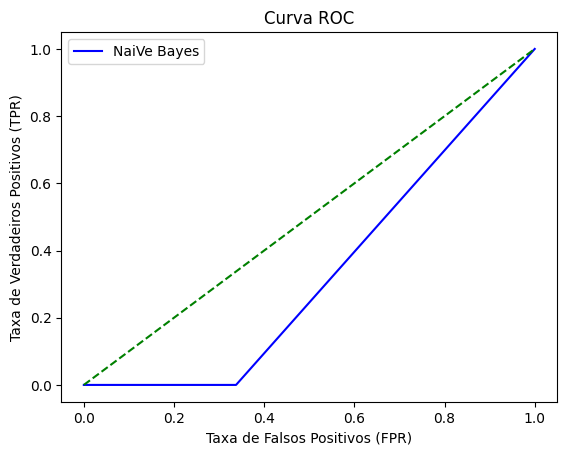


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.96      1.00      0.98        53
           2       0.96      0.96      0.96        54
           3       1.00      0.96      0.98        50

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211

AUC SVM:  0.4050955414012739


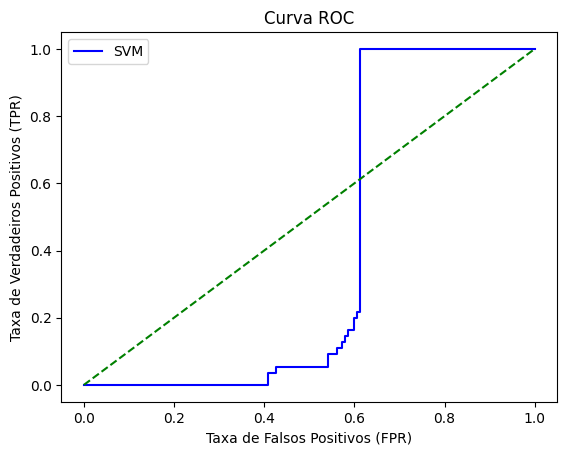


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.96      1.00      0.98        53
           2       0.96      0.96      0.96        54
           3       1.00      0.96      0.98        50

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211

AUC MLP:  0.7028372900984365


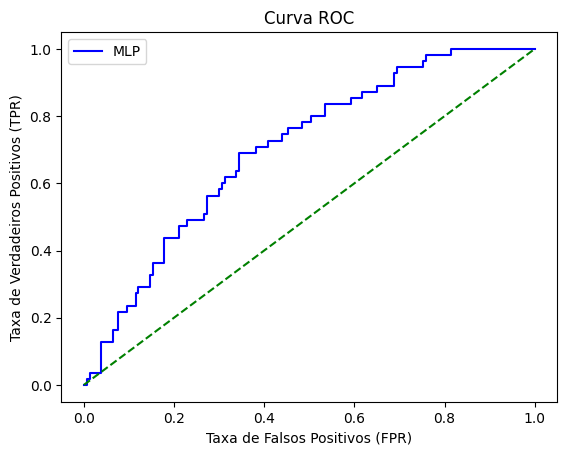

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 286 to 639
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 286 to 639
Series name: Class
Non-Null Count  Dtyp

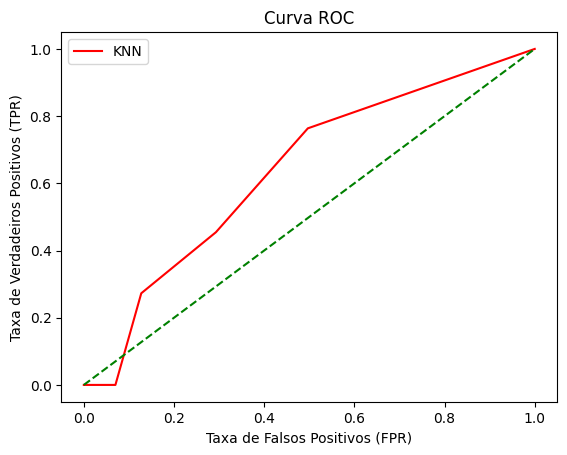


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


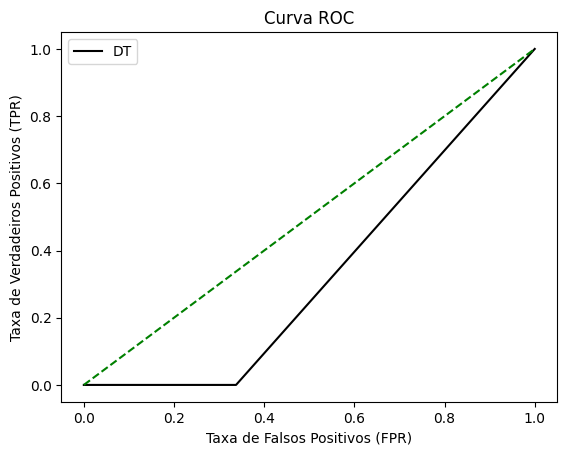


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


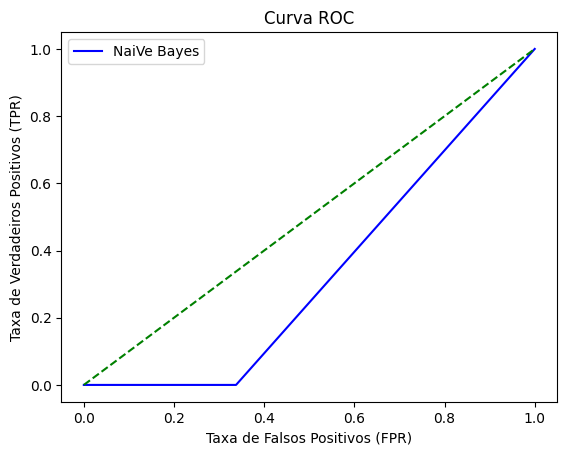


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.95      0.98      0.96        53
           2       0.96      0.94      0.95        54
           3       0.98      0.94      0.96        50

    accuracy                           0.96       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211

AUC SVM:  0.4902142443543718


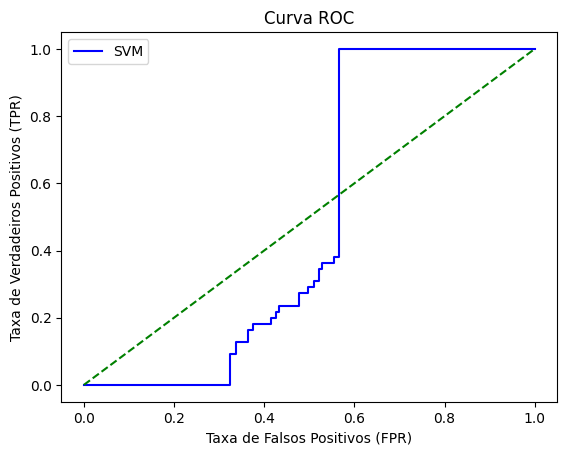


Desempenho do SVM
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.95      0.98      0.96        53
           2       0.96      0.94      0.95        54
           3       0.98      0.94      0.96        50

    accuracy                           0.96       211
   macro avg       0.96      0.96      0.96       211
weighted avg       0.96      0.96      0.96       211

AUC MLP:  0.7489287782281413


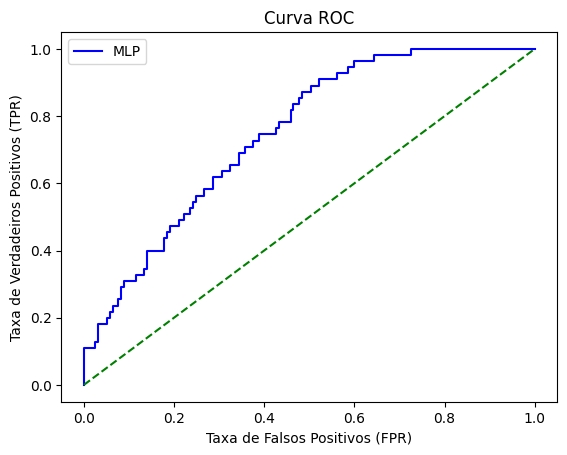

Treino
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 86 to 364
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      423 non-null    int64
 1   A2      423 non-null    int64
 2   A3      423 non-null    int64
 3   A4      423 non-null    int64
 4   A5      423 non-null    int64
 5   A6      423 non-null    int64
 6   A7      423 non-null    int64
 7   A8      423 non-null    int64
 8   A9      423 non-null    int64
 9   A10     423 non-null    int64
 10  A11     423 non-null    int64
 11  A12     423 non-null    int64
 12  A13     423 non-null    int64
 13  A14     423 non-null    int64
 14  A15     423 non-null    int64
 15  A16     423 non-null    int64
 16  A17     423 non-null    int64
 17  A18     423 non-null    int64
 18  Class   423 non-null    int32
dtypes: int32(1), int64(18)
memory usage: 64.4 KB
<class 'pandas.core.series.Series'>
Index: 423 entries, 86 to 364
Series name: Class
Non-Null Count  Dtype


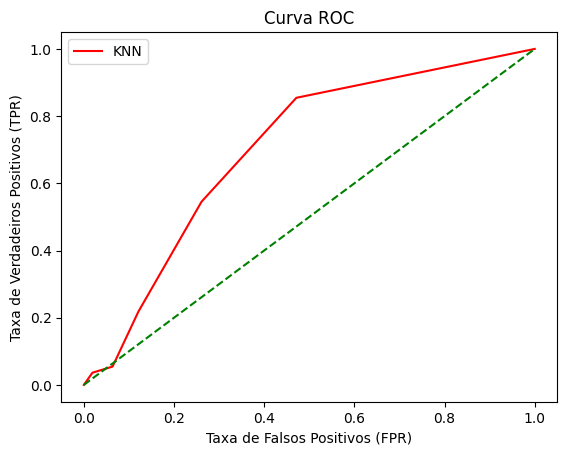


Desempenho da Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC DT:  0.3312101910828026


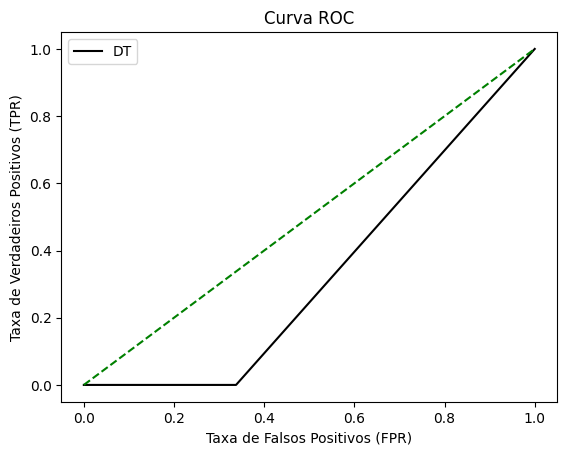


Desempenho do Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        49

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

AUC NB:  0.3312101910828026


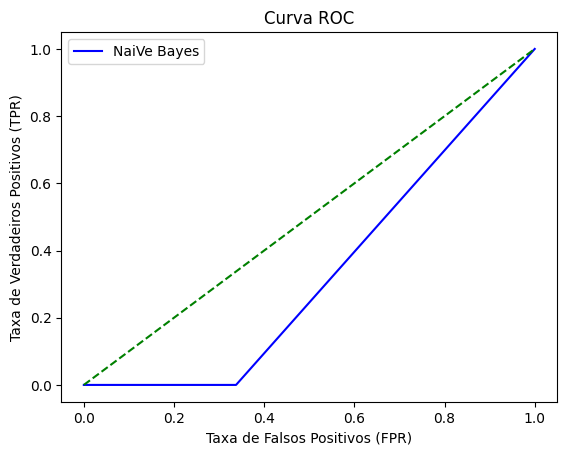


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      0.98      0.97        53
           2       0.98      0.96      0.97        54
           3       0.96      0.98      0.97        50

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211

AUC SVM:  0.36629994209612043


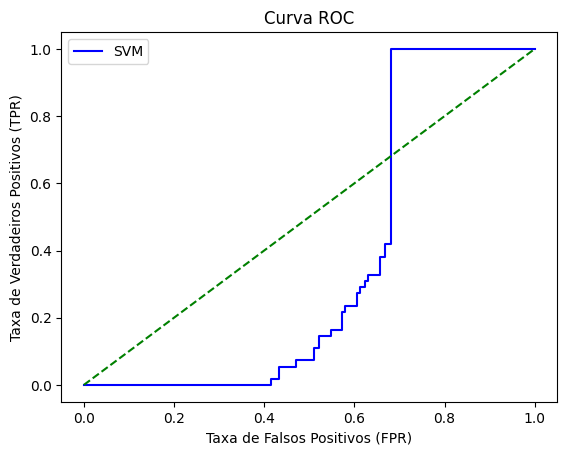


Desempenho do SVM
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      0.98      0.97        53
           2       0.98      0.96      0.97        54
           3       0.96      0.98      0.97        50

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211

AUC MLP:  0.7090909090909091


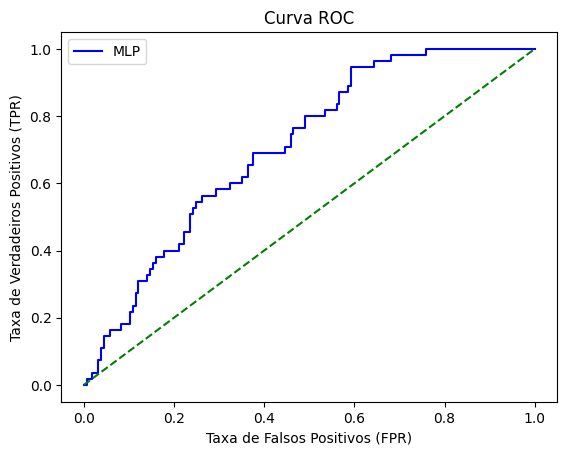

         KNN       DT       NB       SVM       MLP
0   0.689346  0.33121  0.33121  0.356688  0.729589
1   0.680660  0.33121  0.33121  0.444239  0.726346
2   0.681008  0.33121  0.33121  0.326230  0.768269
3   0.704517  0.33121  0.33121  0.369543  0.709323
4   0.683150  0.33121  0.33121  0.355414  0.794557
5   0.683034  0.33121  0.33121  0.341285  0.651650
6   0.707354  0.33121  0.33121  0.335727  0.655819
7   0.731384  0.33121  0.33121  0.347423  0.754951
8   0.676086  0.33121  0.33121  0.467516  0.687203
9   0.666995  0.33121  0.33121  0.437174  0.726115
10  0.722525  0.33121  0.33121  0.382281  0.799537
11  0.744181  0.33121  0.33121  0.450492  0.730168
12  0.730284  0.33121  0.33121  0.341865  0.702142
13  0.720498  0.33121  0.33121  0.260104  0.735495
14  0.728662  0.33121  0.33121  0.395020  0.818761
15  0.706775  0.33121  0.33121  0.385408  0.754951
16  0.683439  0.33121  0.33121  0.432774  0.785061
17  0.714939  0.33121  0.33121  0.405096  0.702837
18  0.635900  0.33121  0.33121 

In [161]:
#Main
auc= []
for i in range (20):
    x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste = ShuffleuSplit(df_dados)
    y_score, fpr, tpr, a = KNN_Func(x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste)
    auc.append(a)
    y_score, fpr, tpr, a = DT_Func(x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste)
    auc.append(a)
    y_score, fpr, tpr, a = NaiveBayes_Func(x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste)
    auc.append(a)
    y_score, fpr, tpr, a, svm_pred_validation = SVM_Func(x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste)
    auc.append(a)
    y_score, fpr, tpr, a = MLP_Func(x_treino, x_temp, y_treino, y_temp, x_validacao, x_teste, y_validacao, y_teste, svm_pred_validation)
    auc.append(a)
    output.loc[len(output.index)] = auc
    auc.clear()
output.to_csv('Output Table.csv')
print(output)
